### TASK 1: TITANIC DATASET

In [1]:
import pandas as pd
df = pd.read_csv('Titanic-Dataset.csv')

print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [2]:
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


==== Decision Tree ====
CV Mean Accuracy: 0.7778
Test Accuracy: 0.7989
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


==== Random Forest ====
CV Mean Accuracy: 0.8115
Test Accuracy: 0.8268
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


==== Logistic Regression ====
CV Mean Accuracy: 0.7935
Test Accuracy: 0.7989
Classification Report:
               precision    recall  f1-score   suppor

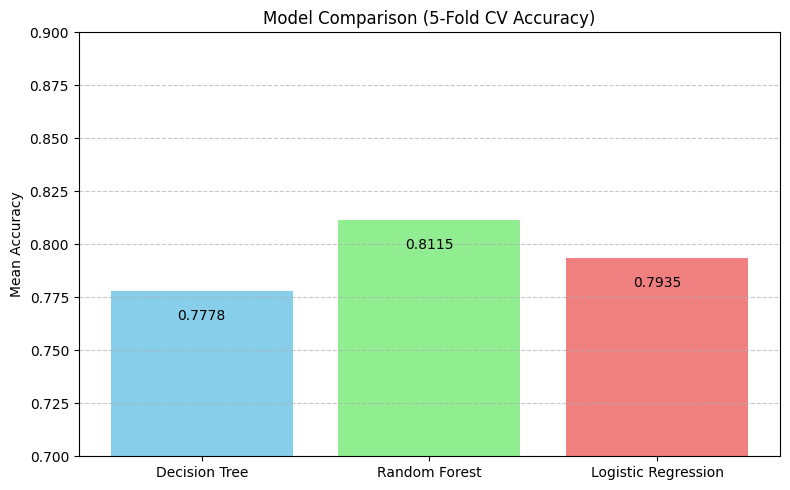

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

cv_scores = {}
test_scores = {}

# Train and evaluate each model
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_scores[name] = scores.mean()

    # Train on training set
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)
    test_scores[name] = accuracy_score(y_test, y_pred)

    print(f"\n==== {name} ====")
    print(f"CV Mean Accuracy: {scores.mean():.4f}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualization of Cross-Validation Accuracy
plt.figure(figsize=(8, 5))
model_names = list(cv_scores.keys())
accuracy_values = list(cv_scores.values())

bars = plt.bar(model_names, accuracy_values, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.ylim(0.7, 0.9)
plt.title('Model Comparison (5-Fold CV Accuracy)')
plt.ylabel('Mean Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height - 0.015, f'{height:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [4]:
new_passengers = pd.DataFrame([
    [3, 1, 22, 0, 0, 7.25, 0],   # Young female, 3rd class
    [1, 0, 45, 1, 0, 84.0, 1],   # Older male, 1st class
    [2, 1, 30, 0, 2, 26.0, 2],   # Mid-age female with children, 2nd class
    [3, 0, 18, 0, 0, 8.05, 0]    # Young male, 3rd class
], columns=features)

result_df = new_passengers.copy()
result_df.index = [f"Passenger {i+1}" for i in range(len(result_df))]

for name, model in models.items():
    preds = model.predict(new_passengers)
    result_df[name] = ['Survived' if pred == 1 else 'Did not survive' for pred in preds]

print("\nPrediction Results:")
print(result_df)


Prediction Results:
             Pclass  Sex  Age  SibSp  Parch   Fare  Embarked    Decision Tree  \
Passenger 1       3    1   22      0      0   7.25         0         Survived   
Passenger 2       1    0   45      1      0  84.00         1  Did not survive   
Passenger 3       2    1   30      0      2  26.00         2         Survived   
Passenger 4       3    0   18      0      0   8.05         0  Did not survive   

               Random Forest Logistic Regression  
Passenger 1         Survived            Survived  
Passenger 2  Did not survive     Did not survive  
Passenger 3         Survived            Survived  
Passenger 4  Did not survive     Did not survive  


###TASK 2: MOVIE RATING PREDICTION

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [15]:
df = pd.read_csv("movies.csv", encoding='ISO-8859-1')
df.drop(columns=["Name"], inplace=True)

df['Duration'] = df['Duration'].str.replace(' min', '', regex=False)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

df.fillna({
    "Genre": "Unknown",
    "Director": "Unknown",
    "Actor 1": "Unknown",
    "Actor 2": "Unknown",
    "Actor 3": "Unknown",
    "Duration": df["Duration"].median(),
    "Votes": df["Votes"].median(),
    "Year": df["Year"].median(),
}, inplace=True)

df["Actors"] = df["Actor 1"] + ", " + df["Actor 2"] + ", " + df["Actor 3"]
df.drop(columns=["Actor 1", "Actor 2", "Actor 3"], inplace=True)

df["Main_Actor"] = df["Actors"].apply(lambda x: x.split(",")[0])

df = pd.get_dummies(df, columns=["Genre", "Director", "Main_Actor"], drop_first=True)
df.dropna(subset=['Rating'], inplace=True)

X = df.drop(columns=["Rating", "Actors"])
y = df["Rating"]
X = X.dropna(axis=1, how='all')

imputer = SimpleImputer(strategy='median')
X_array = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_array, columns=X.columns)
feature_columns = X.columns

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results[name] = {"R²": r2, "RMSE": rmse}
    print(f"{name}:\n  R²: {r2:.4f}  RMSE: {rmse:.2f}")

Linear Regression:
  R²: -0.8790  RMSE: 1.87
Random Forest:
  R²: 0.1691  RMSE: 1.24
XGBoost:
  R²: 0.2476  RMSE: 1.18


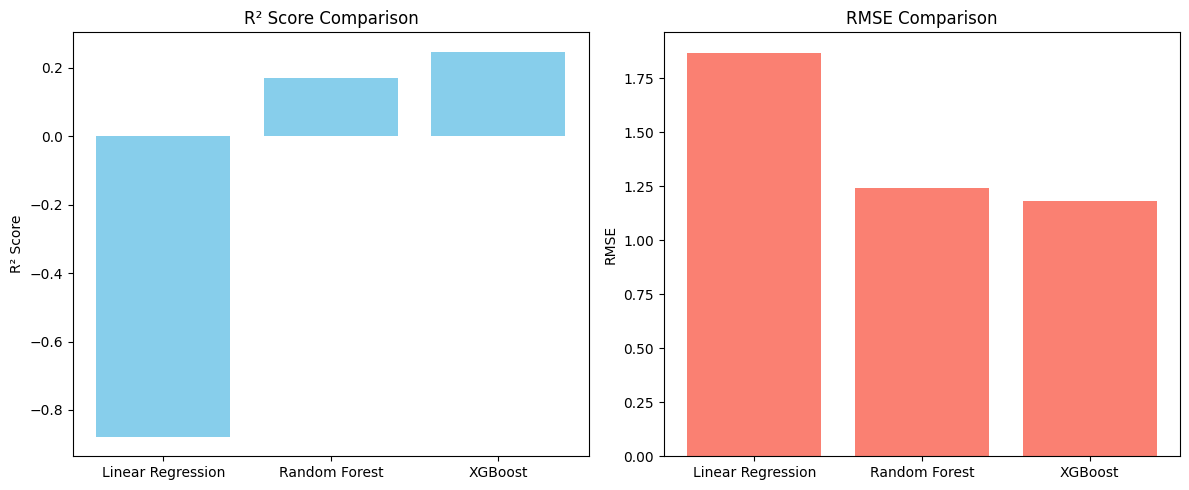

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(results.keys(), [r["R²"] for r in results.values()], color='skyblue')
plt.title("R² Score Comparison")
plt.ylabel("R² Score")

plt.subplot(1, 2, 2)
plt.bar(results.keys(), [r["RMSE"] for r in results.values()], color='salmon')
plt.title("RMSE Comparison")
plt.ylabel("RMSE")

plt.tight_layout()
plt.show()

In [17]:
new_movie = pd.DataFrame(np.zeros((1, len(feature_columns))), columns=feature_columns)

# Set values only if the column exists
if 'Year' in new_movie.columns:
    new_movie['Year'] = 2024
if 'Duration' in new_movie.columns:
    new_movie['Duration'] = 130
if 'Votes' in new_movie.columns:
    new_movie['Votes'] = 50000
if 'Genre_Action' in new_movie.columns:
    new_movie['Genre_Action'] = 1
if 'Director_Christopher Nolan' in new_movie.columns:
    new_movie['Director_Christopher Nolan'] = 1
if 'Main_Actor_Tom Hanks' in new_movie.columns:
    new_movie['Main_Actor_Tom Hanks'] = 1


# Predict with each model
for name, model in models.items():
    pred = model.predict(new_movie)[0]
    print(f"{name} predicted rating: {pred:.2f}")

Linear Regression predicted rating: -15.65
Random Forest predicted rating: 5.57
XGBoost predicted rating: 5.59


### TASK 3: IRIS DATASET

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("IRIS.csv")
print(df.head())

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', probability=True)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Random Forest Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


SVM Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
I

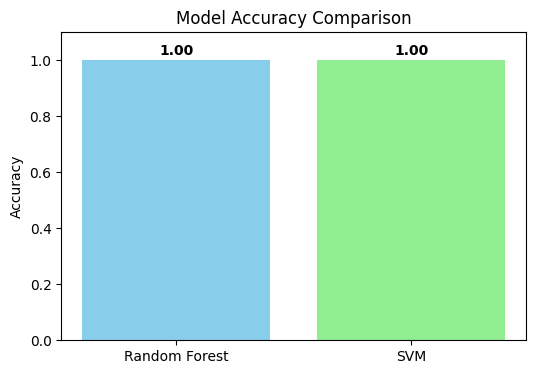


Predictions for new samples:

Random Forest Predictions:
  Flower 1: Iris-setosa
  Flower 2: Iris-versicolor
  Flower 3: Iris-virginica

SVM Predictions:
  Flower 1: Iris-setosa
  Flower 2: Iris-versicolor
  Flower 3: Iris-virginica


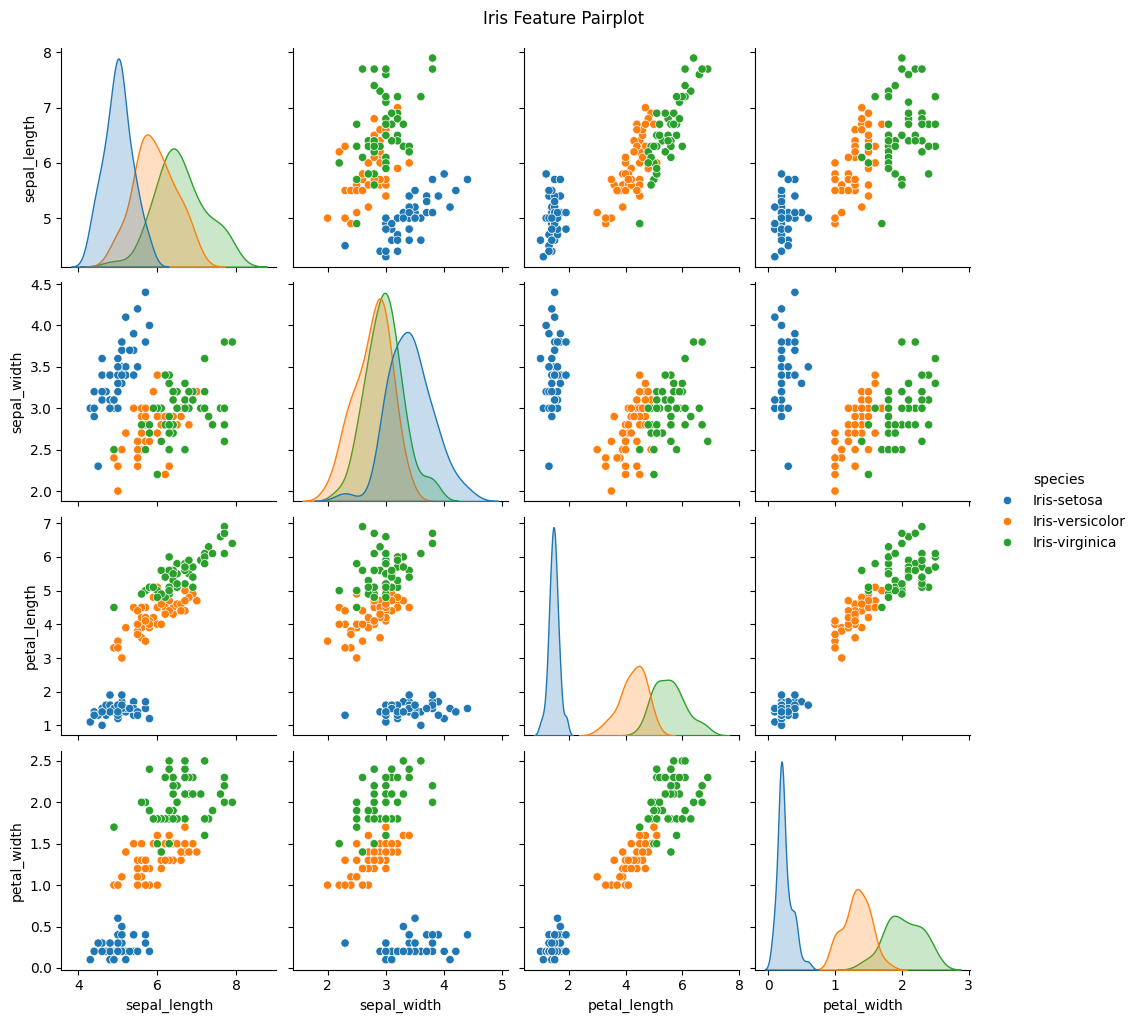

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(results.keys(), results.values(), color=['skyblue', 'lightgreen'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1.1)
for i, v in enumerate(results.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

new_flowers = pd.DataFrame([
    [5.1, 3.5, 1.4, 0.2],   # Likely Setosa
    [6.0, 2.2, 4.0, 1.0],   # Likely Versicolor
    [6.9, 3.1, 5.4, 2.1]    # Likely Virginica
], columns=features)

print("\nPredictions for new samples:")
for name, model in models.items():
    preds = model.predict(new_flowers)
    print(f"\n{name} Predictions:")
    for i, pred in enumerate(preds):
        print(f"  Flower {i+1}: {pred}")

sns.pairplot(df, hue='species')
plt.suptitle("Iris Feature Pairplot", y=1.02)
plt.show()

### TASK 4: SALES PREDICTION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("advertising.csv")
print(df.head())

features = ['TV', 'Radio', 'Newspaper']
X = df[features]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)

    results[name] = {"R2": r2, "MAE": mae, "RMSE": rmse}

    print(f"\n{name} Evaluation:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Linear Regression Evaluation:
  R² Score: 0.9059
  MAE: 1.27
  RMSE: 2.91

Random Forest Evaluation:
  R² Score: 0.9535
  MAE: 0.92
  RMSE: 1.44


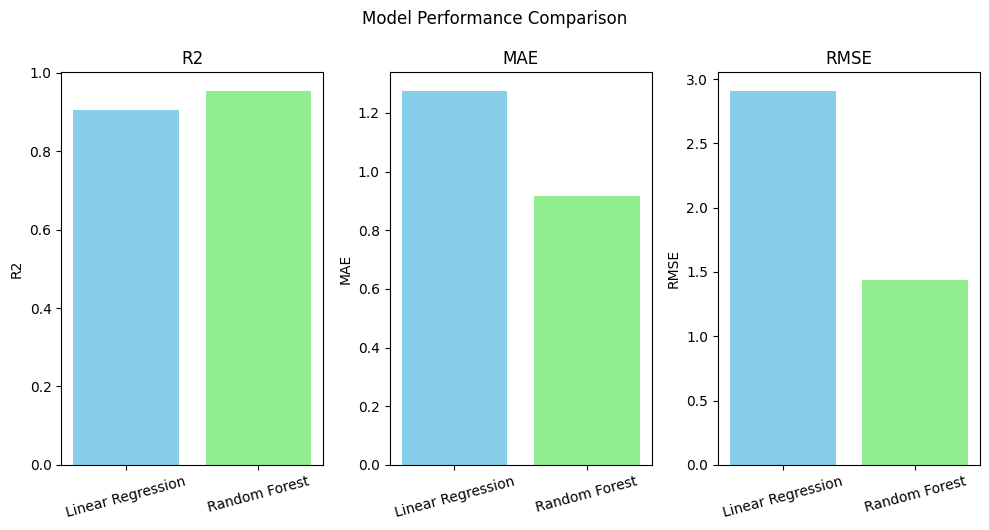

In [ ]:
metrics = ['R2', 'MAE', 'RMSE']
plt.figure(figsize=(10, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    plt.bar(results.keys(), [results[m][metric] for m in results], color=['skyblue', 'lightgreen'])
    plt.title(metric)
    plt.ylabel(metric)
    plt.xticks(rotation=15)
plt.tight_layout()
plt.suptitle("Model Performance Comparison", y=1.05)
plt.show()



In [ ]:
new_data = pd.DataFrame([
    [150, 25, 15],  # Example input
    [200, 50, 20]
], columns=features)

print("\nPredictions for new ad spend:")
for name, model in models.items():
    predictions = model.predict(new_data)
    print(f"\n{name} Predictions:")
    for i, pred in enumerate(predictions):
        print(f"  Scenario {i+1}: Estimated Sales = {pred:.2f}")


Predictions for new ad spend:

Linear Regression Predictions:
  Scenario 1: Estimated Sales = 15.48
  Scenario 2: Estimated Sales = 20.75

Random Forest Predictions:
  Scenario 1: Estimated Sales = 14.98
  Scenario 2: Estimated Sales = 22.96
